Dogs: ['dogs_1.gz', 'dogs_2.gz', 'dogs_3.gz', 'dogs_4.gz']
Cats: ['cats_1.gz', 'cats_2.gz', 'cats_3.gz', 'cats_4.gz']
Raw data shape: (3125, 1, 100, 100) (3125, 1, 100, 100)
Raw data labels shape: (3125,) (3125,)
Final training set: (6250, 1, 100, 100) (6250,)
Final training set size: 238.4185791015625 MB
Dataset randomized


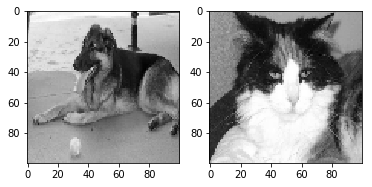

In [119]:
## 1.GET DATA
import joblib
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

"""
Here we shall be creating a mixed data set of dogs + cats.
We originally broke down the data into multiple files
In each epoch we pick one dataset each from dog and cat, and train the CNN
"""

## FETCH THE PROCESSED DATASETS
def get_data(data_idx):
    X_train = []
    y_train = []
    f, axarr = plt.subplots(1,2)
    
    ## DOGS (class = 0)
    dir_name = 'data/dogs/'
    dir_filenames = os.listdir(dir_name)
    print ('Dogs:', dir_filenames) 
    for i, dir_file in enumerate(dir_filenames):
        if i == data_idx:
            with open(dir_name + dir_file, 'rb') as handle:
                data_dogs = joblib.load(handle)
                idx_random = np.random.randint(0,len(data_dogs))
                axarr[0].imshow(data_dogs[idx_random], cmap = plt.cm.gray)
                data_dogs = data_dogs.reshape((data_dogs.shape[0], 1, data_dogs.shape[1], data_dogs.shape[2]))
                # data_dogs = data_dogs.reshape((data_dogs.shape[0], data_dogs.shape[1], data_dogs.shape[2]))
                label_dogs = np.full((data_dogs.shape[0],), 0)

    ## CATS (class = 1)
    dir_name = 'data/cats/'
    dir_filenames = os.listdir(dir_name)
    print ('Cats:', dir_filenames) 
    for i, dir_file in enumerate(dir_filenames):
        if i == data_idx:
            with open(dir_name + dir_file, 'rb') as handle:
                data_cats = joblib.load(handle)
                idx_random = np.random.randint(0,len(data_cats))
                axarr[1].imshow(data_cats[idx_random], cmap = plt.cm.gray)
                data_cats = data_cats.reshape((data_cats.shape[0], 1, data_cats.shape[1], data_cats.shape[2]))
                # data_cats = data_dogs.reshape((data_cats.shape[0], data_cats.shape[1], data_cats.shape[2]))
                label_cats = np.full((data_cats.shape[0],),1)

    print ('Raw data shape:', data_dogs.shape, data_cats.shape)
    print ('Raw data labels shape:', label_dogs.shape, label_cats.shape)
    X_train = np.append(data_dogs, data_cats, axis = 0)
    y_train = np.append(label_dogs, label_cats, axis = 0)
    data_dogs = []
    data_cats = []
    print ('Final training set:', X_train.shape, y_train.shape)
    print ('Final training set size:', X_train.nbytes/1024.0/1024.0, 'MB')

    randomize = np.arange(len(X_train))
    np.random.shuffle(randomize)
    X_train = X_train[randomize]
    y_train = y_train[randomize]
    print ('Dataset randomized')
    
    return X_train, y_train

data_idx = 0
X_train, y_train_list = get_data(data_idx)

In [120]:
# np.full((100,), 7)
y_train_list

array([1, 1, 1, ..., 0, 0, 1])

In [ ]:
## Verify data
import random
import matplotlib.pyplot as plt
%matplotlib inline

KERAS_BOOL = 1

if KERAS_BOOL:
    from keras.utils import np_utils
    y_train = np_utils.to_categorical(y_train_list, 2)
    # print ('Shape of y_train:', y_train.shape)
    # print ('Data of y_train:', y_train)
    idx_random = random.randint(0, len(X_train))
    X_train_temp = X_train[idx_random][0]
    y_train_temp = y_train[idx_random]
    plt.imshow(X_train_temp, cmap = plt.cm.gray)
    print ('Idx:', idx_random)
    print ('Class:', y_train_temp)
    print ('cat' if y_train_temp[1] == 1 else 'dog')
else:
    idx_random = random.randint(0, len(X_train))
    X_train_temp = X_train[idx_random][0]
    y_train_temp = y_train_list[idx_random]
    plt.imshow(X_train_temp, cmap = plt.cm.gray)
    print ('Idx:', idx_random)
    print ('Class:', y_train_temp)
    print ('Animal:','cat' if y_train_temp == 1 else 'dog')

In [ ]:
# from keras import backend as K
# import imp
# os.environ['KERAS_BACKEND'] = 'theano'
# imp.reload(K)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D

model = Sequential()

model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,100,100), data_format='channels_first'))
# model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(100,100,1)))
print ('First layer:', model.output_shape)
model.add(Convolution2D(32, (3, 3), activation='relu'))
print ('Second layer:', model.output_shape)
model.add(MaxPooling2D(pool_size=(2,2)))
print ('Thrid layer:', model.output_shape)
model.add(Dropout(0.25))
 
model.add(Flatten())
print ('Fourth layer:', model.output_shape)
model.add(Dense(128, activation='relu'))
print ('Fifth layer:', model.output_shape)
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32, epochs = 10, verbose=1, shuffle=True)

First layer: (None, 32, 98, 98)
Second layer: (None, 30, 96, 32)
Thrid layer: (None, 15, 48, 32)
Fourth layer: (None, 23040)
Fifth layer: (None, 128)
Epoch 1/10
6250/6250 [==============================] - 76s - loss: 8.0616 - acc: 0.4998    
Epoch 2/10
6250/6250 [==============================] - 75s - loss: 8.0598 - acc: 0.4998    
Epoch 3/10
6250/6250 [==============================] - 75s - loss: 8.0590 - acc: 0.5000    
Epoch 4/10
6250/6250 [==============================] - 75s - loss: 8.0590 - acc: 0.5000    
Epoch 5/10
6250/6250 [==============================] - 75s - loss: 8.0590 - acc: 0.5000    
Epoch 6/10
5408/6250 [========================>.....] - ETA: 10s - loss: 8.1038 - acc: 0.4972